## 获取数据

In [1]:
# 股票数据
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 1, 1)
df = web.DataReader('GOOGL', 'stooq', start, end)
df.dropna(inplace=True)
df.sort_index(inplace=True)
print(df)

                Open      High       Low     Close    Volume
Date                                                        
2020-01-02   67.4205   68.4340   67.3245   68.4340  27285300
2020-01-03   67.4000   68.6875   67.3660   68.0760  23412580
2020-01-06   67.5815   69.9160   67.5500   69.8905  46786860
2020-01-07   70.0230   70.1750   69.5780   69.7555  34529120
2020-01-08   69.7410   70.5925   69.6315   70.2520  35325480
...              ...       ...       ...       ...       ...
2023-12-22  140.7700  141.9900  140.7100  141.4900  26532199
2023-12-26  141.5900  142.6800  141.1900  141.5200  16780333
2023-12-27  141.5900  142.0800  139.8860  140.3700  19628618
2023-12-28  140.7800  141.1400  139.7500  140.2300  16045712
2023-12-29  139.6300  140.3600  138.7800  139.6900  18733017

[1006 rows x 5 columns]


In [ ]:
# 负荷数据
import pandas as pd
filename = 'data\electricity.csv'
df = pd.read_csv(filename).iloc[:1000,:]
df.dropna(inplace=True)
df.sort_index(inplace=True)
print(df)

## 输入输出

In [3]:
# mem_his_days=5
# per_days=10
# df.dropna(inplace=True)
# df.sort_index(inplace=True)

# df['label'] = df['Close'].shift(-per_days)
df.iloc[:,:]

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,67.4205,68.4340,67.3245,68.4340,27285300
2020-01-03,67.4000,68.6875,67.3660,68.0760,23412580
2020-01-06,67.5815,69.9160,67.5500,69.8905,46786860
2020-01-07,70.0230,70.1750,69.5780,69.7555,34529120
2020-01-08,69.7410,70.5925,69.6315,70.2520,35325480
...,...,...,...,...,...
2023-12-22,140.7700,141.9900,140.7100,141.4900,26532199
2023-12-26,141.5900,142.6800,141.1900,141.5200,16780333
2023-12-27,141.5900,142.0800,139.8860,140.3700,19628618


In [4]:
# def stock_price_lstm_data_precesing(df,mem_his_days=5,per_days=10):

mem_his_days=5
per_days=10
# df.dropna(inplace=True)
# df.sort_index(inplace=True)

# 股票数据
df['label'] = df['Close'].shift(-per_days)
# 负荷数据
# df['label'] = df['OT'].shift(-per_days)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sca_X = scaler.fit_transform(df.iloc[:,1:-1])
# sca_X = np.array(df.iloc[:,:-1])
# print(sca_X)

from collections import deque
deq = deque(maxlen=mem_his_days)

X = []
for i in sca_X:
    deq.append(list(i))
    if len(deq)==mem_his_days:
        X.append(list(deq))

X_lately = X[-per_days:]
X = X[:-per_days]
y = df['label'].values[mem_his_days-1:-per_days]

import numpy as np
X = np.array(X)
y = np.array(y)

    # return X,y,X_lately

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# sca_X = scaler.fit_transform(df.iloc[:,:-1])
# # sca_X = df.iloc[:,:-1]
# print(sca_X)

In [ ]:
# X,y,X_lately = stock_price_lstm_data_precesing(df,mem_his_days=5,per_days=50)

In [5]:
print(X.shape)
print(y.shape)
print(len(X_lately))

(992, 5, 4)
(992,)
10


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

## 读取推理

In [7]:
from tensorflow.keras.models import load_model
best_model = load_model('save_model\\lstm_val_mape4.85_epoch78_InputShape(None,5,4)')
best_model.summary()

Model: "lstm_m5_p10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 32)             4736      
_________________________________________________________________
dropout (Dropout)            (None, 5, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 

In [8]:
# best_model.evaluate(X_test,y_test)
pre = best_model.predict(X_test)
print(pre)

[[136.72972 ]
 [ 74.000244]
 [ 99.620605]
 [126.7545  ]
 [133.62845 ]
 [100.40131 ]
 [132.61401 ]
 [ 96.67006 ]
 [ 88.5869  ]
 [135.33752 ]
 [132.61543 ]
 [123.69027 ]
 [ 75.42084 ]
 [131.86513 ]
 [ 77.37145 ]
 [ 73.21704 ]
 [ 94.18707 ]
 [113.86659 ]
 [ 93.89306 ]
 [140.47893 ]
 [ 65.745865]
 [116.3148  ]
 [133.96077 ]
 [ 70.42442 ]
 [ 83.99547 ]
 [ 93.74878 ]
 [130.85165 ]
 [137.93073 ]
 [ 74.588326]
 [137.3995  ]
 [122.28737 ]
 [ 75.65441 ]
 [ 59.99382 ]
 [105.410484]
 [ 67.74004 ]
 [111.37837 ]
 [141.66098 ]
 [112.50995 ]
 [142.7083  ]
 [ 90.47691 ]
 [134.99194 ]
 [ 77.67608 ]
 [137.7882  ]
 [137.00375 ]
 [ 87.39337 ]
 [114.581726]
 [134.79865 ]
 [ 77.21568 ]
 [ 98.05827 ]
 [ 99.98825 ]
 [ 97.80165 ]
 [115.349335]
 [ 94.15244 ]
 [ 98.34769 ]
 [134.73853 ]
 [ 95.01466 ]
 [129.09242 ]
 [134.23215 ]
 [132.0096  ]
 [ 90.7216  ]
 [ 74.81865 ]
 [133.09566 ]
 [ 75.86192 ]
 [125.32469 ]
 [140.06921 ]
 [134.63885 ]
 [ 68.499176]
 [135.5159  ]
 [130.17511 ]
 [ 73.508606]
 [117.82208 ]
 [115.

In [9]:
print(X_test.shape)
print(y_test.shape)
print(pre.shape)

(100, 5, 4)
(100,)
(100, 1)


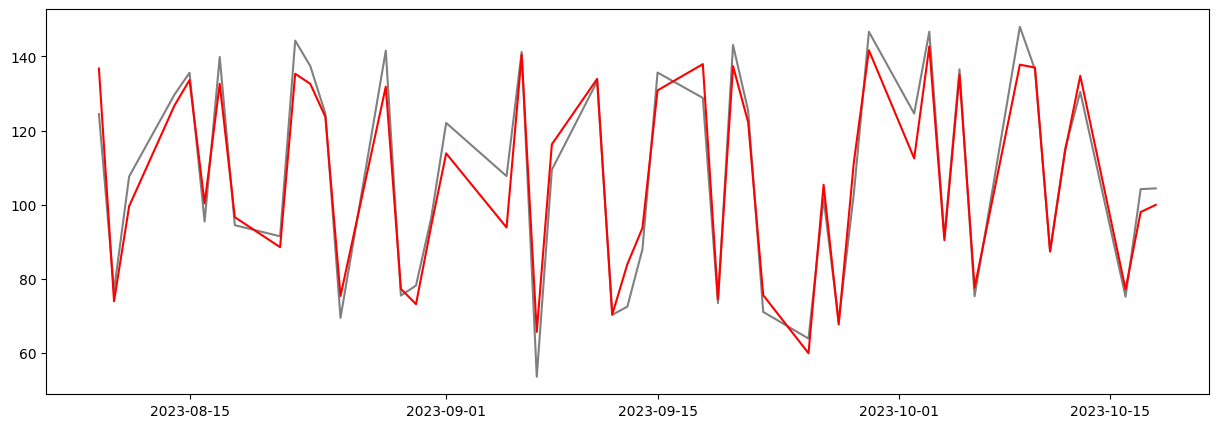

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
df_time = df.index[-len(y_test):]
plt.plot(df_time[:50],y_test[:50],color='gray',label='price')
plt.plot(df_time[:50],pre[:50],color='red',label='predict')
plt.show()

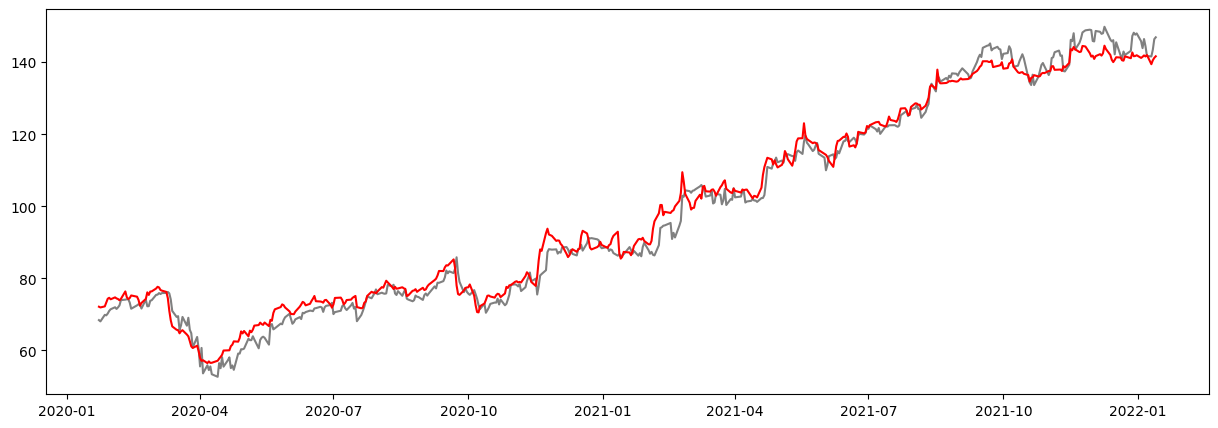

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
df_time = df.index[-len(y):]
show_len = np.arange(500)
plt.plot(df_time[show_len],df['Close'].values[show_len],color='gray',label='price')
plt.plot(df_time[show_len],best_model.predict(X)[show_len],color='red',label='predict')
plt.show()

## 评价指标

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def model_evaluation(y_true, y_pred):
    # 均方误差（MSE）
    mse = mean_squared_error(y_true, y_pred)
    # 均方根误差（RMSE）
    rmse = np.sqrt(mse)
    # 平均绝对误差（MAE）
    mae = mean_absolute_error(y_true, y_pred)
    # R平方（R2）
    r2 = r2_score(y_true, y_pred)
    # 解释方差得分（Explained Variance Score）
    explained_variance = explained_variance_score(y_true, y_pred)
    return mse,rmse,mae,r2,explained_variance



## 控制仿真

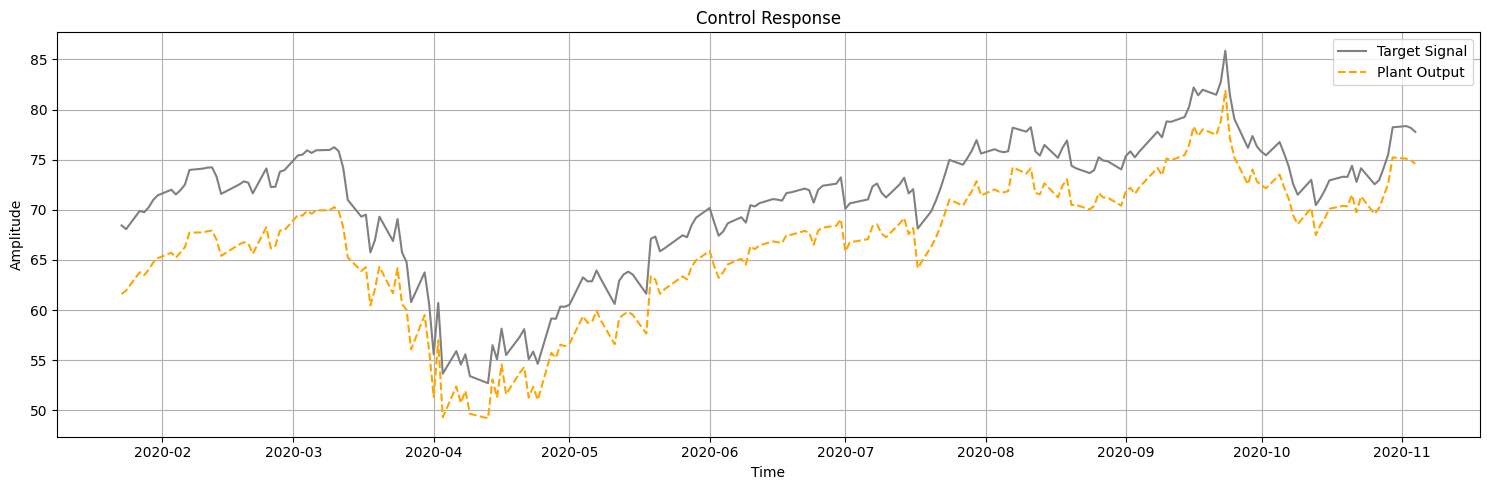

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class PlantModel:
    def __init__(self,time_constant=10.0):
        self.time_constant = time_constant

    def response(self, control_input, previous_output):
        model_response = previous_output + (control_input - previous_output) / self.time_constant
        model_response += 0*np.random.randn()
        return model_response

class PIDController:
    def __init__(self, Kp=5.0, Ki=0.5, Kd=0.1):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.prev_error = 0
        self.integral = 0

    def control(self, reference_signal, model_response):
        error = reference_signal - model_response
        self.integral += error
        derivative = error - self.prev_error
        control_signal = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return control_signal

def target_function(step):
    # # 定义控制目标函数
    # filename = 'data\electricity_cleaned.txt'
    # data_frame = pd.read_csv(filename, header=None)
    # matrix = data_frame.values
    # target_signal = matrix[step]

    # 定义控制目标函数
    matrix = df['Close'].values
    target_signal = matrix[step]
    return target_signal   

def pre_function(step,pre_step):
    matrix = best_model.predict(X)
    pre_signal = matrix[step+pre_step]
    return pre_signal

if __name__ == "__main__":
    # 创建被控对象
    plant_model = PlantModel()
    # 创建PID控制器
    pid_controller = PIDController(Kp=10e0, Ki=5e-2, Kd=1e-2)
    # 模拟过程
    steps = 200
    time = np.arange(steps)
    ref_signals = [target_function(step) for step in time]
    # per_signals = [pre_function(step,0) for step in time]

    predicts = [0]
    for pre_step in predicts:
        model_responses = [ref_signals[0]]
        control_signals = []
        for step in range(steps):
            control_signal = pid_controller.control(target_function(step), model_responses[-1])
            control_signals.append(control_signal)
            model_response = plant_model.response(control_signal, model_responses[-1])
            model_responses.append(model_response)
        # print('pre_step:%d'%pre_step,model_evaluation(ref_signals,model_responses[1:]))

    plt.figure(figsize=(15, 5))
    plt.plot(df_time[:steps], ref_signals, label='Target Signal', color='gray')
    # plt.plot(time, per_signals, label='Plant Output', linestyle='-', color='blue')
    plt.plot(df_time[:steps], model_responses[1:], label='Plant Output', linestyle='--', color='orange')
    # plt.plot(time, control_signals, label='Controlled Output', linestyle='-', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Control Response')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## MPC

In [ ]:
import numpy as np
import tensorflow as tf
from scipy.optimize import minimize

# 假设你已经有了训练好的 LSTM 模型
input_dim = 1
output_dim = 1
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(None, input_dim), return_sequences=True),
    tf.keras.layers.Dense(output_dim)
])
model.compile(optimizer='adam', loss='mse')

# 定义MPC控制器
def mpc_control(current_state):
    # 定义控制优化目标函数
    def objective_function(u):
        # 假设控制变量是单变量的
        predicted_response = model.predict(np.array([[current_state, u]]))
        predicted_response = predicted_response[0][0]
        # 定义控制目标，比如最小化预测响应与目标响应的误差
        target_response = 1.0  # 假设目标响应是1
        return (predicted_response - target_response)**2

    # 初始控制量猜测
    initial_guess = np.array([0.0])

    # 使用优化算法（这里使用简单的最小化算法，也可以使用更复杂的优化算法）
    result = minimize(objective_function, initial_guess)

    # 返回最优的控制量
    return result.x[0]

# 模拟控制过程
current_state = 0.0  # 初始状态
for i in range(10):  # 模拟10个时刻的控制过程
    # 使用MPC控制器计算最优的控制量
    control_input = mpc_control(current_state)
    
    # 执行控制操作，更新系统状态
    # 这里假设控制操作是直接改变系统状态的
    current_state += control_input
    
    # 打印当前状态和控制量，这里用于示例，实际应用中可能会发送控制量到被控对象
    print("时刻 {}: 状态 = {:.2f}, 控制量 = {:.2f}".format(i+1, current_state, control_input))


## 动力学模型

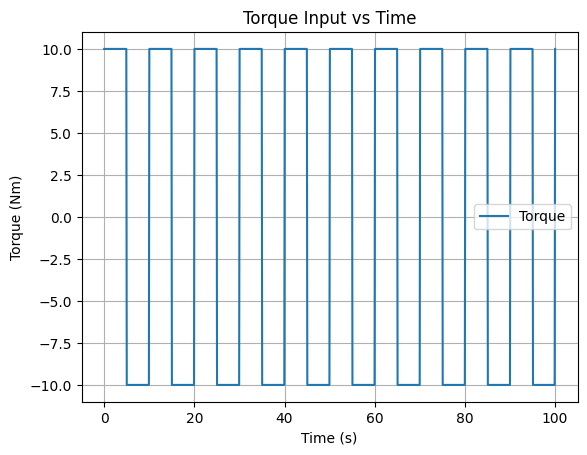

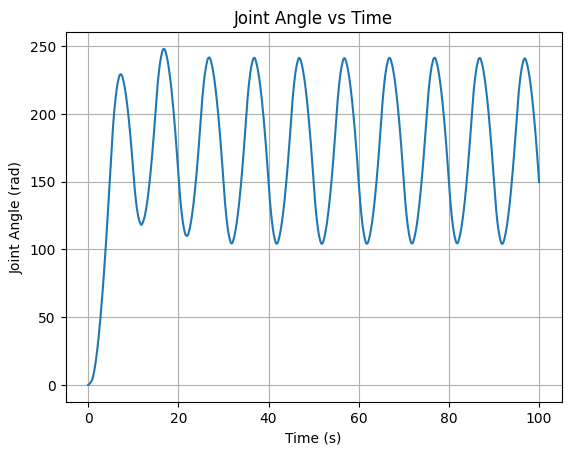

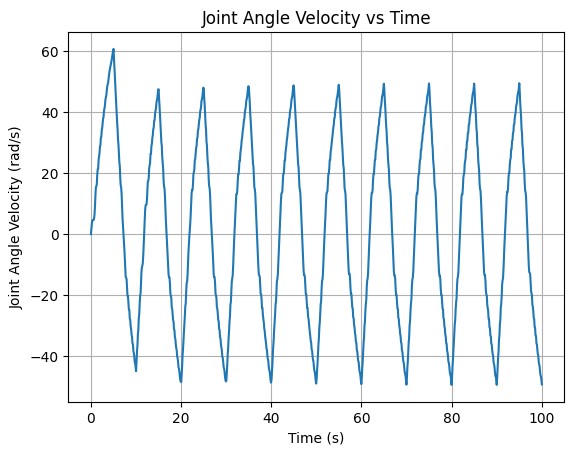

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def torque_function(t):
    # 生成扭矩函数
    period = 10
    amplitude = 10
    duty_cycle = 0.5
    t_in_period = t % period
    if t_in_period < period * duty_cycle:
        return amplitude
    else:
        return -amplitude

class PlantModel:
    def __init__(self, initial_angle=0.0, initial_angular_velocity=0.0):
        self.initial_angle = initial_angle
        self.initial_angular_velocity = initial_angular_velocity
        
    def dynamics(self, theta, t, torque_function):
        # 这里假设系统为单自由度（单个关节），所以只有一个状态变量theta
        # torque是关节扭矩，t是时间
        torque = torque_function(t)
        # 系统参数
        m = 1.0  # 质量
        l = 1.0  # 长度
        g = 9.81  # 重力加速度
        friction_coefficient = 0.1 # 摩擦系数
        inertia = 0.5 # 惯性
        # 动力学方程
        theta_dot = theta[1]
        theta_dot_dot = (torque - friction_coefficient * theta[1] - m * g * l * np.sin(theta[0])) / inertia
        return [theta_dot, theta_dot_dot]

    def simulate(self, current_angle, current_angular_velocity, t_list,torque_function):
        # 模拟函数，模拟关节角度随时间的变化
        # 初始条件
        theta_initial = [current_angle, current_angular_velocity]  # 初始角度和初始角速度
        # 使用odeint求解微分方程
        theta = odeint(self.dynamics, theta_initial, t_list, args=(torque_function,))
        # 返回角度、角速度随时间的变化
        return theta

# 使用
initial_angle = 0.0
initial_angular_velocity = 0.0
plant = PlantModel(initial_angle, initial_angular_velocity)

# 假设当前角度和角速度
current_angle = initial_angle
current_angular_velocity = initial_angular_velocity

# 模拟关节角度随时间的变化
t_list = np.linspace(0, 100, 1000)  # 时间从0到100秒，共1000个时间步长
torque_values = [torque_function(ti) for ti in t_list]
angles = plant.simulate(current_angle, current_angular_velocity, t_list,torque_function)

# 绘制扭矩输入序列
plt.plot(t_list, torque_values, label='Torque')
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.title('Torque Input vs Time')
plt.grid(True)
plt.legend()
plt.show()

# 绘制关节角度随时间的变化
plt.plot(t_list, angles[:,0])
plt.xlabel('Time (s)')
plt.ylabel('Joint Angle (rad)')
plt.title('Joint Angle vs Time')
plt.grid(True)
plt.show()

# 绘制关节角速度随时间的变化
plt.plot(t_list, angles[:,1])
plt.xlabel('Time (s)')
plt.ylabel('Joint Angle Velocity (rad/s)')
plt.title('Joint Angle Velocity vs Time')
plt.grid(True)
plt.show()


## 动力学模型控制仿真

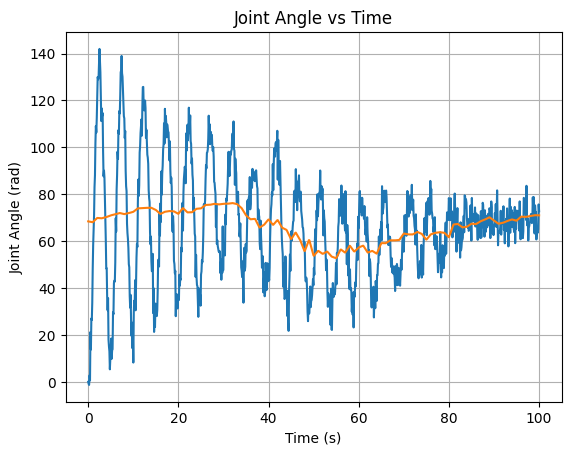

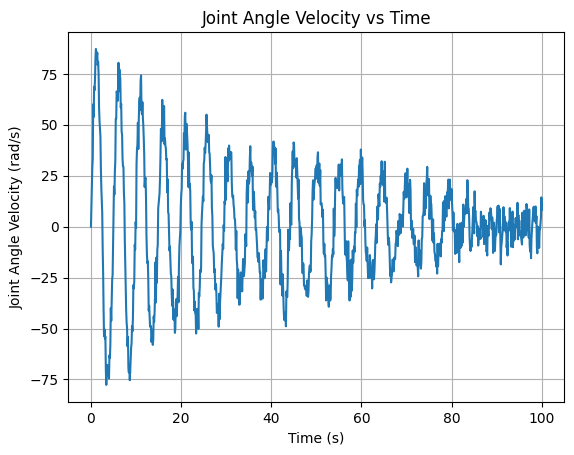

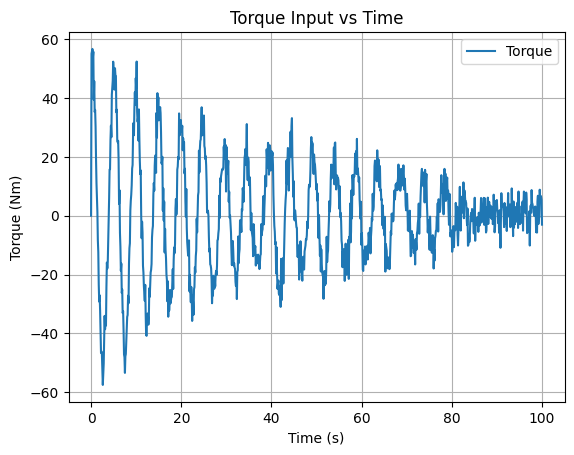

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.interpolate import interp1d

# def target_function(t):
#     # 控制目标函数
#     target_signal = 100 if t>20 else 0
#     return target_signal 

def target_function(t):
    # 定义控制目标函数
    matrix = df['Close'].values
    interp_func = interp1d(range(len(matrix)), matrix, kind='linear', fill_value="extrapolate")
    target_signal = interp_func(t)
    return target_signal.tolist()


def activation_function(matrix):
    # return np.maximum(0, matrix)
    return matrix

class PIDController:
    def __init__(self, Kp=1.0, Ki=0.5, Kd=0.1):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.prev_error = 0
        self.integral = 0

    def control(self, reference_signal, model_response):
        error = reference_signal - model_response
        self.integral += error
        derivative = error - self.prev_error
        control_signal = self.Kp * activation_function(error) + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return control_signal

class PlantModel:
    def __init__(self, initial_angle=0.0, initial_angular_velocity=0.0):
        self.initial_angle = initial_angle
        self.initial_angular_velocity = initial_angular_velocity
        
    def dynamics(self, t, theta, torque):
        # 系统参数
        m = 1.0  # 质量
        l = 1.0  # 长度
        g = 9.81  # 重力加速度
        friction_coefficient = 0.1 # 摩擦系数
        inertia = 0.5 # 惯性
        
        # 动力学方程
        theta_dot = theta[1]
        theta_dot_dot = (torque - friction_coefficient * theta[1] - m * g * l * np.sin(theta[0])) / inertia
        return [theta_dot, theta_dot_dot]

    def simulate(self, current_angle, current_angular_velocity, t_list, torque_function):
        # 模拟函数，模拟关节角度随时间的变化
        # 初始条件
        theta_initial = [current_angle, current_angular_velocity]  # 初始角度和初始角速度
        
        # 创建ode对象
        solver = ode(self.dynamics).set_integrator('dopri5')
        solver.set_initial_value(theta_initial, t_list[0])
        
        # 存储结果
        angles = [theta_initial]
        torque_values = [0]
        
        # 模拟关节角度随时间的变化
        for t_next in t_list[1:]:
            # 计算扭矩，扭矩等于控制器输出
            torque = torque_function(target_function(t_next), angles[-1][0])
            torque_values.append(torque)
            
            # 求解微分方程
            solver.set_f_params(torque)
            solver.integrate(t_next)
            y = solver.y + 5*np.random.randn()
            angles.append(y)
        
        return np.array(angles), np.array(torque_values)

# 动力学模型初始化
initial_angle = 0.0
initial_angular_velocity = 0.0
plant = PlantModel(initial_angle, initial_angular_velocity)

# 控制器初始化
pid_controller = PIDController(Kp=8e-1, Ki=5e-3, Kd=1e-3)

# 假设当前角度和角速度
current_angle = initial_angle
current_angular_velocity = initial_angular_velocity

# 模拟关节角度随时间的变化
t_list = np.linspace(0, 100, 1000)  # 时间从0到100秒，共1000个时间步长
ref_signals = [target_function(t) for t in t_list]

angles, torque_values = plant.simulate(current_angle, current_angular_velocity, t_list, pid_controller.control)

# 绘制关节角度随时间的变化
plt.plot(t_list, angles[:,0])
plt.plot(t_list, ref_signals, label='Target Signal')
plt.xlabel('Time (s)')
plt.ylabel('Joint Angle (rad)')
plt.title('Joint Angle vs Time')
plt.grid(True)
plt.show()

# 绘制关节角速度随时间的变化
plt.plot(t_list, angles[:,1])
plt.xlabel('Time (s)')
plt.ylabel('Joint Angle Velocity (rad/s)')
plt.title('Joint Angle Velocity vs Time')
plt.grid(True)
plt.show()

# 绘制扭矩输入序列
plt.plot(t_list, torque_values, label='Torque')
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.title('Torque Input vs Time')
plt.grid(True)
plt.legend()
plt.show()


## ZNN求解

In [ ]:
# 求解时变线性矩阵方程
import numpy as np

# 定义激活函数，这里使用ReLU函数
def activation_function(matrix):
    return np.maximum(0, matrix)

# 定义ZNN的更新规则
def znn_update(X, A, B, C, A_dot, B_dot, C_dot, gamma):
    # 计算误差矩阵 E(t) = A(t)X(t)B(t) + X(t) - C(t)
    error = A @ X @ B + X - C
    # 假设我们已经有了误差矩阵的时间导数 _E(t)
    error_dot = A_dot @ X @ B + A @ X @ B_dot + A @ X @ B + X - C_dot
    # 使用激活函数处理误差矩阵
    F_error = activation_function(error)
    # 更新规则 _X(t) = -γ * (∇E/∇X)
    X_dot = -gamma * (A_dot @ F_error @ B + A @ F_error @ B_dot + A @ F_error @ B + F_error)
    return X + X_dot

# ZNN主函数
def znn_solve(A, B, C, A_dot, B_dot, C_dot, gamma=0.1, max_iterations=1000, tolerance=1e-6):
    X = np.eye(A.shape[1])  # 初始猜测为单位矩阵
    for i in range(max_iterations):
        X_new = znn_update(X, A, B, C, A_dot, B_dot, C_dot, gamma)
        if np.linalg.norm(X_new - X) < tolerance:  # 检查是否收敛
            return X_new
        X = X_new
    return X

# 示例：使用ZNN解决时变线性矩阵方程
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 10], [11, 12]])
A_dot = np.zeros_like(A)  # 示例中假设时间导数为零
B_dot = np.zeros_like(B)
C_dot = np.zeros_like(C)
gamma = 0.1

# 求解矩阵方程
X_solution = znn_solve(A, B, C, A_dot, B_dot, C_dot, gamma)
print("Solution X:\n", X_solution)

Solution X:
 [[-100.6 -118.2]
 [-218.1 -253.1]]


In [ ]:
import numpy as np

# 定义 ZNN 辨识器的更新规则
def znn_update(X, A, B, C, A_dot, B_dot, C_dot, gamma):
    error = A @ X @ B + X - C
    error_dot = A_dot @ X @ B + A @ X @ B_dot + A @ X @ B + X - C_dot
    F_error = np.maximum(0, error)
    X_dot = -gamma * (A_dot @ F_error @ B + A @ F_error @ B_dot + A @ F_error @ B + F_error)
    return X + X_dot

# ZNN 主函数
def znn_solve(A, B, C, A_dot, B_dot, C_dot, gamma=0.1, max_iterations=1000, tolerance=1e-6):
    X = np.eye(A.shape[1])  # 初始化猜测为单位矩阵
    for i in range(max_iterations):
        X_new = znn_update(X, A, B, C, A_dot, B_dot, C_dot, gamma)
        if np.linalg.norm(X_new - X) < tolerance:  # 检查是否收敛
            return X_new
        X = X_new
    return X

# 示例：使用 ZNN 辨识器作为控制器来控制一个简单的系统
# 系统模型（假设已知）
A_system = np.array([[0.5, 0.2], [-0.1, 0.3]])  # 系统状态方程的系数矩阵
B_system = np.array([[1], [0.5]])              # 输入系数矩阵
C_system = np.array([[1, 0], [0, 1]])          # 输出矩阵

# ZNN 辨识器参数（初始设定）
A_dot = np.zeros_like(A_system)
B_dot = np.zeros_like(B_system)
C_dot = np.zeros_like(C_system)
gamma = 0.1

# 设定期望输出
desired_output = np.array([[2], [1]])

# 控制器主循环
for t in range(100):
    # 使用 ZNN 辨识器估计系统动态特性
    X_estimate = znn_solve(A_system, B_system, C_system, A_dot, B_dot, C_dot, gamma)

    # 计算控制信号（假设为期望输出与实际输出的差）
    control_signal = desired_output - C_system

    # 使用控制信号控制系统
    # 这里可以将控制信号发送到系统，并获取实际输出

    # 在每个控制周期内更新 ZNN 辨识器参数
    # 这里可以根据实际输出和期望输出计算误差，并使用 ZNN 辨识器进行参数更新

    # 打印控制信号
    print("Control signal:", control_signal)


Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control signal: [[1 2]
 [1 0]]
Control 